## Reading and Understanding the Data

Let us first import essential Libraries and read the Lead dataset

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)

In [2]:
# Importing dataset
lead_df = pd.read_csv(r'C:\Users\HP\Downloads\\Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Let's check the dimensions of the dataframe
lead_df.shape

(9240, 37)

In [4]:
# let's look at the statistical aspects of the dataframe
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Let's see the type of each column
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
#Checking for Duplicates in Dataset
lead_df.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [7]:
#Checking for Duplicates in Dataset
lead_df.duplicated(subset = ['Lead Number'], keep = False).sum()

0

## Data Preparation and Visualising

In [8]:
# We can observe there are many Select values which are as good as NULL.
# Converting 'Select' values to NaN.
lead_df = lead_df.replace('Select', np.nan)

In [9]:
#checking null values in each rows
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
#checking percentage of null values in each column
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Drop Columns with more than 40% missing values 
lead_df = lead_df.drop(lead_df.loc[:,list(round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)>40)].columns, 1)

In [12]:
# Again checking percentage of null values in each column
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Check all the Category Columns with their value count

In [13]:
for column in lead_df:
    print(lead_df[column].astype('category').value_counts(dropna=False))
    print("                      ")
    print(" XXXX------------------------------------------------XXXX ")
    print("                      ")

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
                      
 XXXX------------------------------------------------XXXX 
                      
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
                      
 XXXX------------------------------------------------XXXX 
                      
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Imp

No    9240
Name: Update me on Supply Chain Content, dtype: int64
                      
 XXXX------------------------------------------------XXXX 
                      
No    9240
Name: Get updates on DM Content, dtype: int64
                      
 XXXX------------------------------------------------XXXX 
                      
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64
                      
 XXXX------------------------------------------------XXXX 
                      
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
                      
 XXXX------------------------------------------------XXXX 
                      
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
                      
 XX

## Exploratory Data Analysis

##### For further inspection let's look specificaly at Country column

In [14]:
#checking value counts of Country column

lead_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
Nigeria                    4
Kuwait                     4
South Africa               4
Germany                    4
Sweden                     3
China                      2
Uganda                     2
Italy                      2
Bangladesh                 2
Philippines                2
Netherlands                2
Asia/Pacific Region        2
Belgium                    2
Ghana                      2
Russia                     1
Kenya                      1
Indonesia                  1
Malaysia                   1
Vietnam                    1
Switzerland   

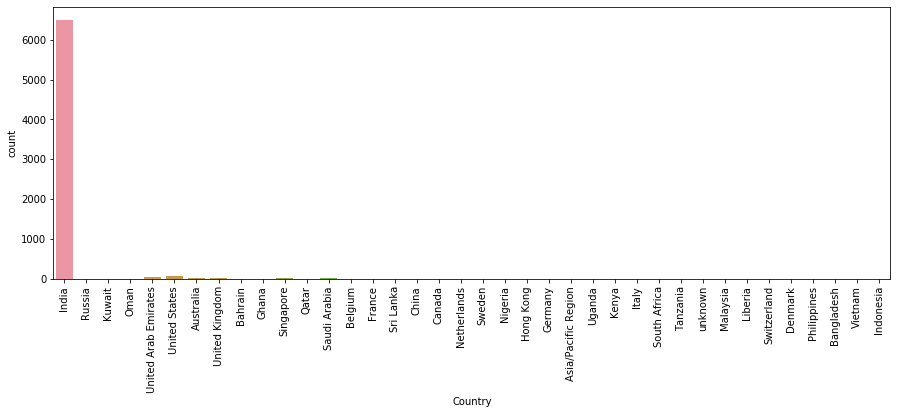

In [15]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.Country)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Since most number of counts are from India or NaN values we need to drop Country Column 

In [16]:
lead_df.drop('Country',inplace=True,axis=1)

### Impute missing or merge less skewed values 

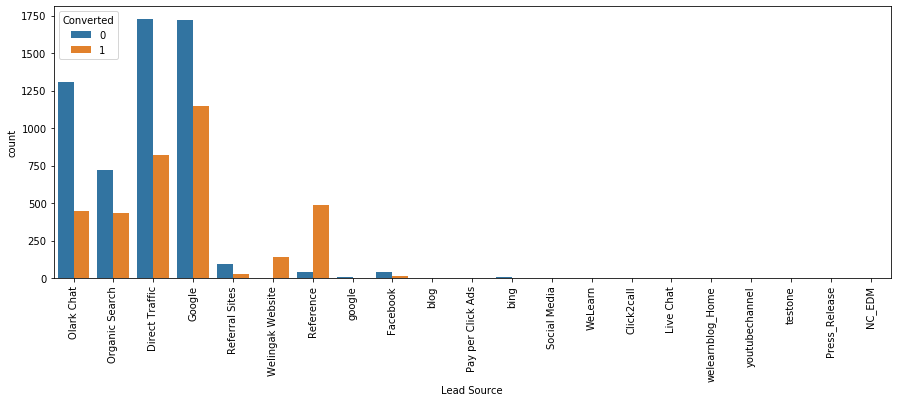

In [17]:
#plotting spread of Lead source columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['Lead Source'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Since column's values are very much insignificant we should treat them

In [18]:

lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'],'Google')

lead_df['Lead Source'] = lead_df['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','Live Chat','Pay per Click Ads','welearnblog_Home'
                                                        ,'NC_EDM','WeLearn','blog','testone','youtubechannel'],'Other Source')


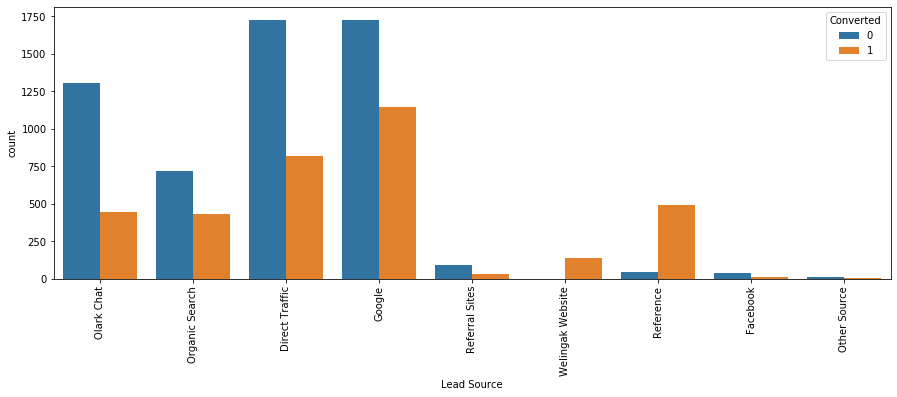

In [19]:
#plotting spread of Lead Source column after Grouping

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['Lead Source'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### INFERENCE:
#####  Google and Direct Traffic are the biggest source for Lead .
##### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat,organic search, direct traffic,and google leads.
##### Conversion Rate of reference leads and welingak website is comparitively high than non-converted.

In [20]:
# Last Activity:

lead_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

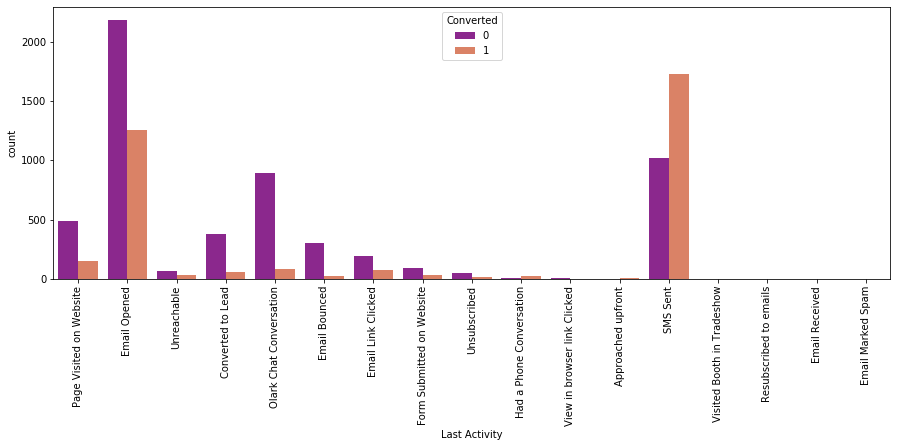

In [21]:
#plotting spread of Last Activity columnn before grouping

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['Last Activity'], hue=lead_df.Converted,color='red',palette="plasma")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### We can group some of the lower frequency occuring labels under a common label 'Others'

In [22]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace([ 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

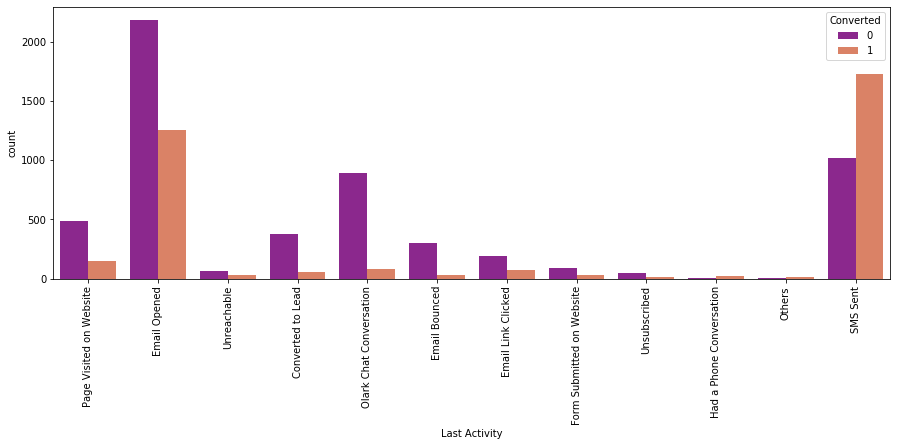

In [23]:
#plotting spread of Last Activity columnn after replacing  values

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['Last Activity'], hue=lead_df.Converted,color='red',palette="plasma")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference:
###### Customers are more active on Email Opened,SMS Sent,Olark Chat conversion lastly.

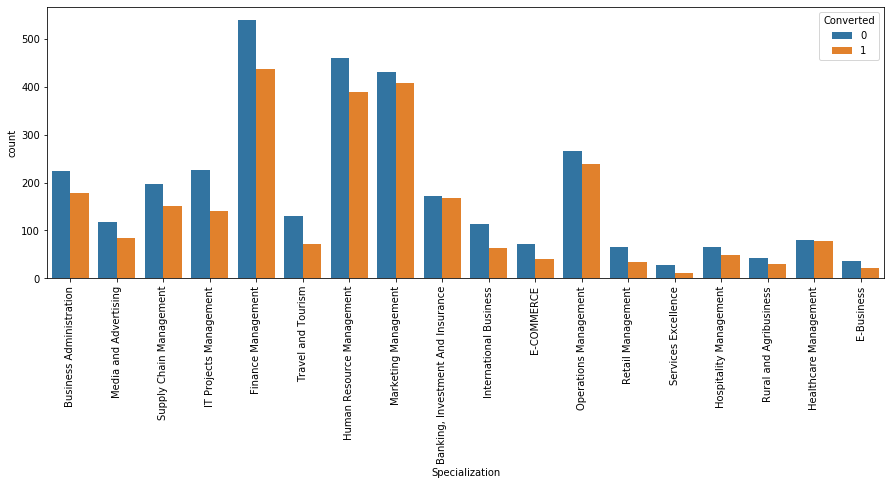

In [24]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.Specialization,hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### We see that specialization with Management in them have higher number of leads as well as leads converted. 
##### Replacing NAN with Not Specified will be better approach here.

In [25]:
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Not Specified')

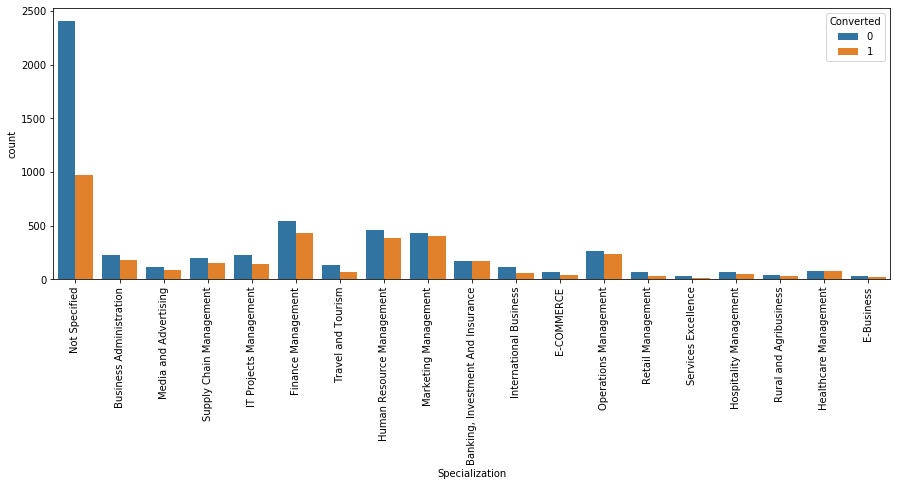

In [26]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.Specialization,hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference: We see that specialization with Management in them have higher number of leads as well as leads converted.So this is definitely a significant variable and should not be dropped. 

In [27]:
#What is your current occupation

lead_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

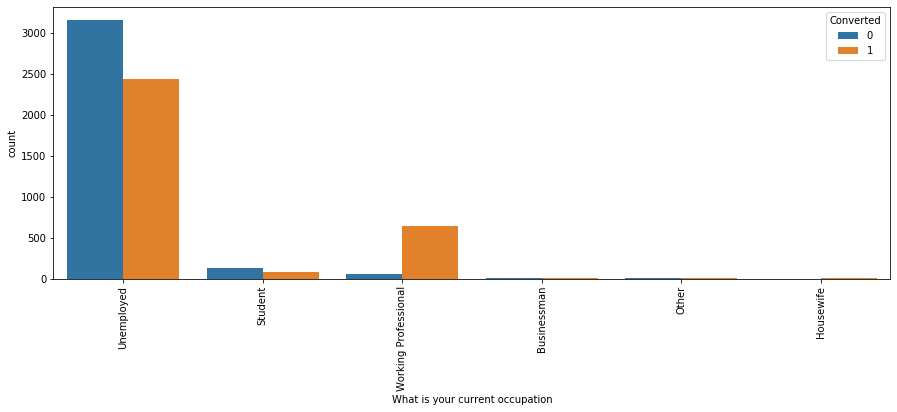

In [28]:
#plotting spread of What is your current occupation columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['What is your current occupation'],hue=lead_df['Converted'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### There are some Nan value which is replace by unemployed as it will be good , Imputing some low frequency variable with Others.

In [29]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(['Housewife','Businessman'],'Other')

In [30]:
#checking value counts 
lead_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     34
Name: What is your current occupation, dtype: int64

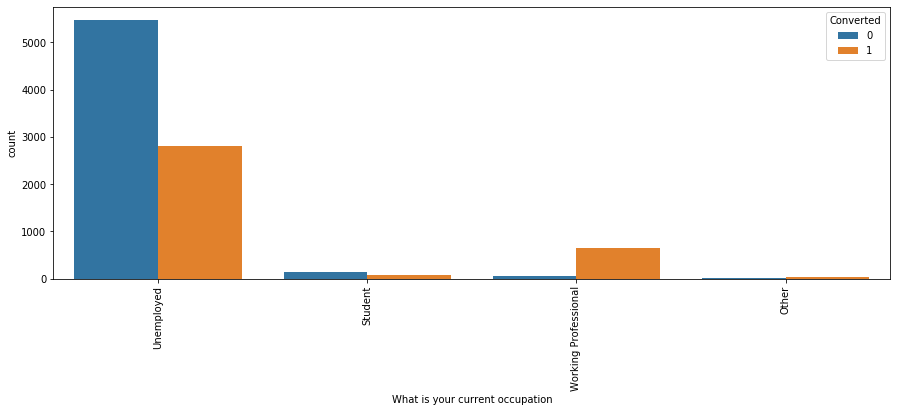

In [31]:
#plotting spread of what is your current occupation  columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['What is your current occupation'],hue=lead_df['Converted'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### Most of the  Leads are unemployed , Working Professionals going for the course have high chances of joining it.

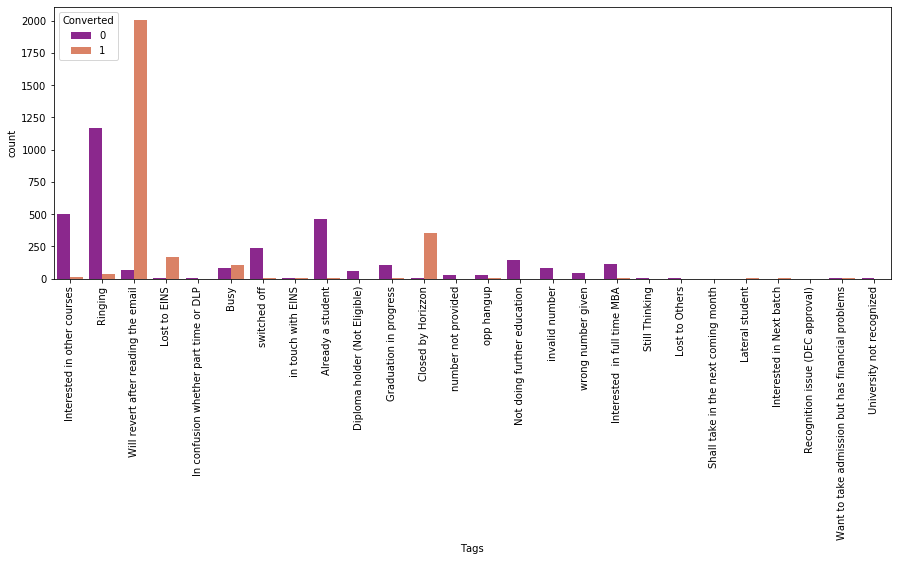

In [32]:
#plotting spread of Tags columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['Tags'],hue=lead_df['Converted'],color='red',palette="plasma")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

###### Replacing low frequency data with 'Other Tags'.

In [33]:
lead_df['Tags'] = lead_df['Tags'].replace(['Lost to Others','Still Thinking','Want to take admission but has financial problems'
                                                             ,'Interested in Next batch','In confusion whether part time or DLP'
                                                             ,'Lateral student','Shall take in the next coming month'
                                                             ,'University not recognized','Recognition issue (DEC approval)'],'Other Tags')

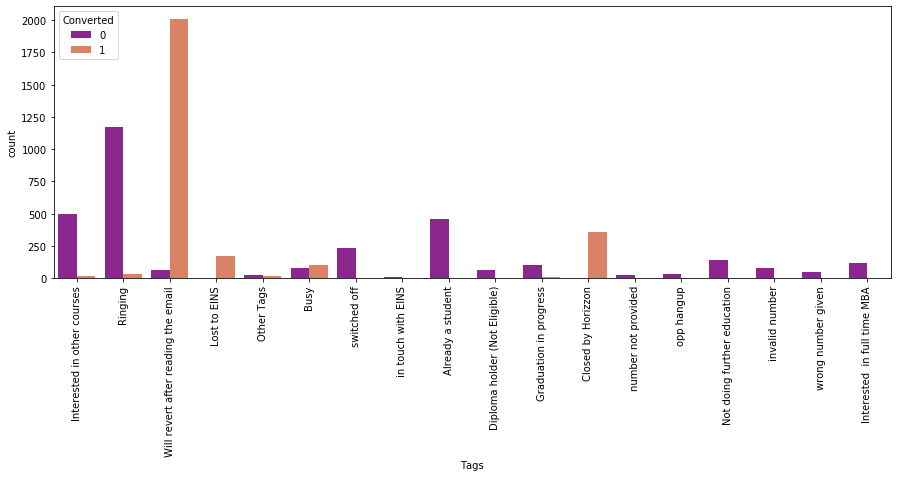

In [34]:
#plotting spread of Tags columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['Tags'],hue=lead_df['Converted'],color='red',palette="plasma")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [35]:
#checking value counts of Tags column
lead_df['Tags'].value_counts(dropna=False)

NaN                                    3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
invalid number                           83
Diploma holder (Not Eligible)            63
wrong number given                       47
Other Tags                               37
opp hangup                               33
number not provided                      27
in touch with EINS                       12
Name: Tags, dtype: int64

#### Here we can observe the most of the value are NAN,So better to drop this columns

In [36]:
#checking value counts of City column

lead_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

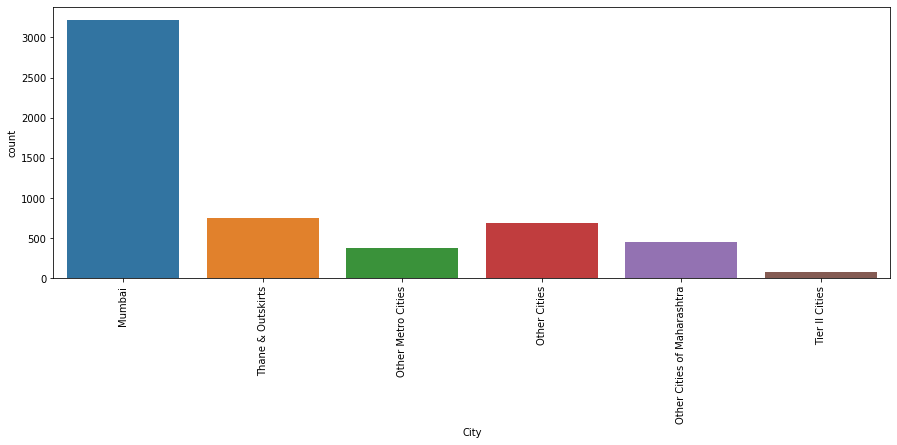

In [37]:
#plotting spread of City columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.City)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Since Mumbai is the most common occurrence among the non-missing values we can impute all missing values with Mumbai


In [38]:
lead_df['City'] = lead_df['City'].replace(np.nan,'Mumbai')

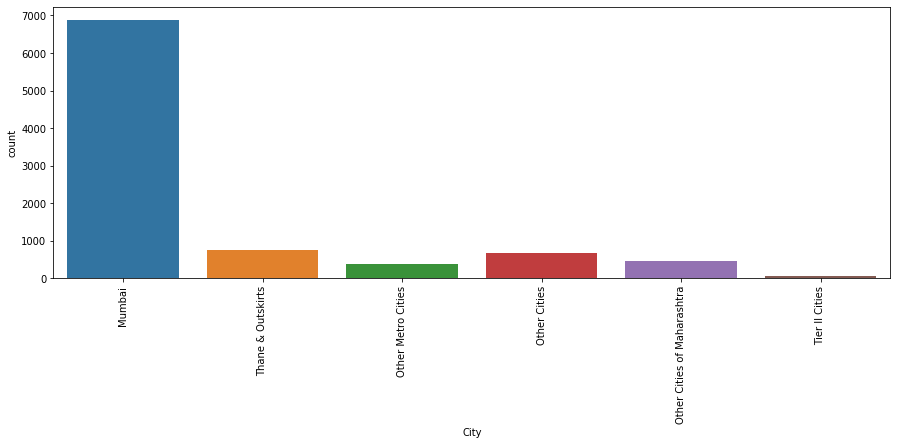

In [39]:
#plotting spread of City columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.City)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### As we can see the Number of Values for Mumbai are very high , this column can be dropped.

In [40]:
(lead_df['City'].value_counts(dropna=False) / lead_df['City'].value_counts(dropna=False).sum()) * 100

Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

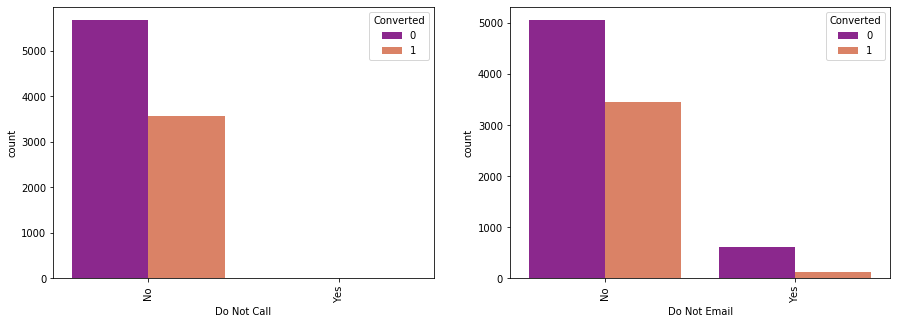

In [41]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(lead_df['Do Not Call'], hue=lead_df.Converted,color='red',palette="plasma")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(lead_df['Do Not Email'], hue=lead_df.Converted,color='red',palette="plasma")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()


In [42]:
#checking value counts for Do Not Email
lead_df['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [43]:
#checking value counts for Do Not Call
lead_df['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

#### We Can drop the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

In [44]:
#Lead Origin
lead_df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

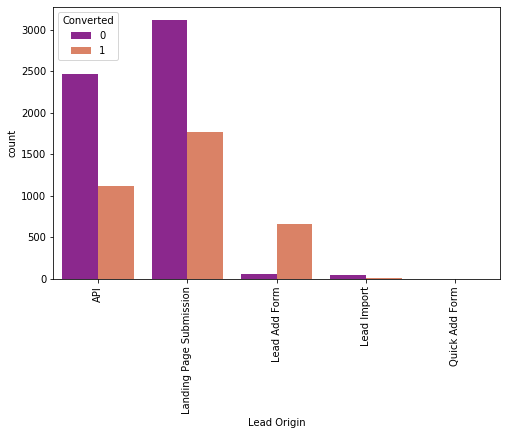

In [45]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(lead_df['Lead Origin'], hue=lead_df.Converted,color='red',palette="plasma")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Inference
#### Landing Page Submission and API bring higher number of leads as well as conversion.
#### Lead Add Form has a very high conversion rate but count of leads are not very high.
#### Lead Import and Quick Add Form get very few leads.
#### In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form


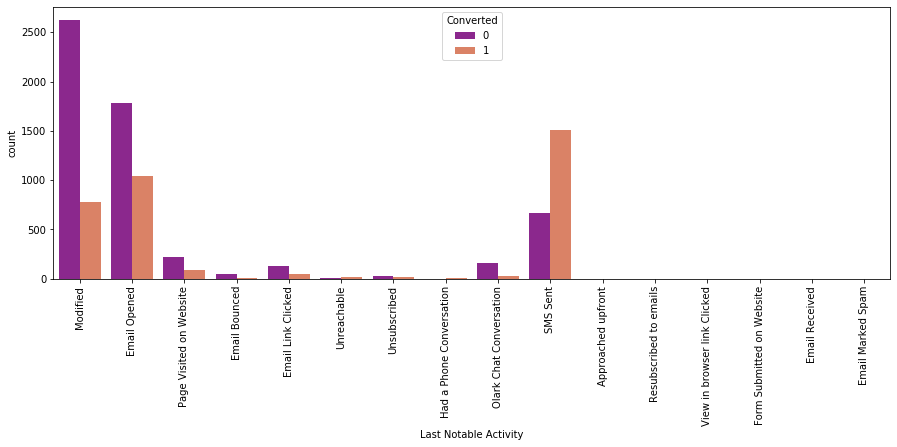

In [46]:
#plotting spread of Last Notable Activity columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['Last Notable Activity'],hue=lead_df['Converted'],color='red',palette="plasma")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### We can group some of the lower frequency occurring labels under a common label 'Others'

In [47]:
lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(['Email Marked Spam','View in browser link Clicked'
                                                                             ,'Resubscribed to emails','Form Submitted on Website'
                                                                             ,'Email Received','Approached upfront'],'Others')

In [48]:
(lead_df['Last Notable Activity'].value_counts(dropna=False) / lead_df['City'].value_counts(dropna=False).sum()) * 100

Modified                    36.872294
Email Opened                30.595238
SMS Sent                    23.506494
Page Visited on Website      3.441558
Olark Chat Conversation      1.980519
Email Link Clicked           1.872294
Email Bounced                0.649351
Unsubscribed                 0.508658
Unreachable                  0.346320
Had a Phone Conversation     0.151515
Others                       0.075758
Name: Last Notable Activity, dtype: float64

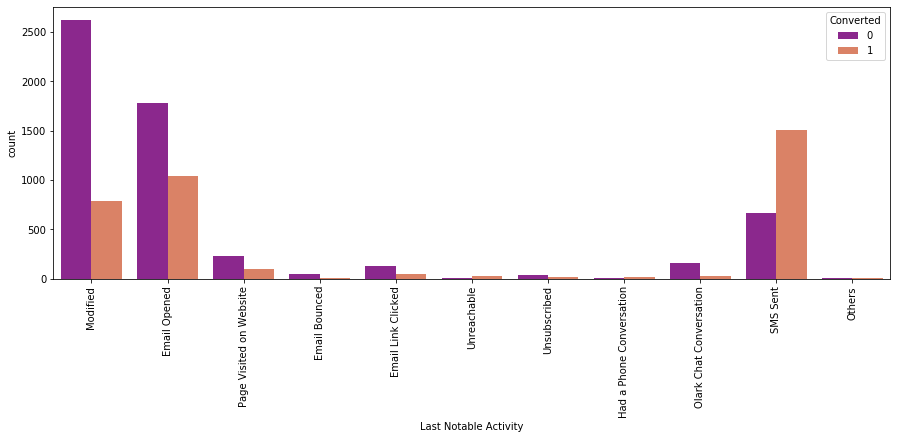

In [49]:
#plotting spread ofLast Notable Activity  columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['Last Notable Activity'],hue=lead_df['Converted'],color='red',palette="plasma")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference: Conversion Rate high in Sms sent Activity as compared to others.

### Drop imbalance Columns

In [50]:
lead_df.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

##### We Can drop the Column since > 98% is of only one Value

In [51]:
lead_df.Magazine.value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

#### We Can drop the Column since 100% is of only one Value

In [52]:
lead_df['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

#### We Can drop the Column since > 99% is of only one Value

In [53]:
lead_df['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

#### We Can drop the Column since > 99% is of only one Value

In [54]:
lead_df['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

#### We Can drop the Column since > 99% is of only one Value

In [55]:
lead_df['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

#### We Can drop the Column since > 99% is of only one Value

In [56]:
lead_df['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

#### We Can drop the Column since > 99% is of only one Value

In [57]:
lead_df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

#### We Can drop Column the since  100% is of only one Value

In [58]:
lead_df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

##### We Can drop the Column since  100% is of only one Value

In [59]:
lead_df['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

##### We Can drop the Column since  100% is of only one Value

In [60]:
lead_df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

##### We Can drop the Column since  100% is of only one Value

In [61]:
# Imbalanced columns to be dropped
lead_df.drop(['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums',
               'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
              'Update me on Supply Chain Content','Get updates on DM Content','Tags','City','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [62]:
# Again checking percentage of null values in each column
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

### Dropping missing Rows of Columns

In [63]:
lead_df=lead_df[~pd.isnull(lead_df['TotalVisits'])]

In [64]:
lead_df=lead_df[~pd.isnull(lead_df['Page Views Per Visit'])]

In [65]:
lead_df=lead_df[~pd.isnull(lead_df['Last Activity'])]

In [66]:
lead_df=lead_df[~pd.isnull(lead_df['Lead Source'])]

#### Prospect ID and Lead Number columns are not necessary for Prediction , so we drop them .

In [67]:
lead_df.drop('Prospect ID',inplace=True,axis=1)

In [68]:
lead_df.drop('Lead Number',inplace=True,axis=1)

In [69]:
# Again checking percentage of null values in each column
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [70]:
lead_df.shape

(9074, 12)

### Check Count of unique values in columns

In [71]:
(lead_df['Lead Origin'].value_counts(dropna=False) / lead_df['Lead Origin'].value_counts(dropna=False).sum()) * 100

Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64

In [72]:
(lead_df['Lead Source'].value_counts(dropna=False) / lead_df['Lead Source'].value_counts(dropna=False).sum()) * 100

Google              31.661891
Direct Traffic      28.025127
Olark Chat          19.318933
Organic Search      12.717655
Reference            4.882081
Welingak Website     1.421644
Referral Sites       1.377562
Facebook             0.341635
Other Source         0.253471
Name: Lead Source, dtype: float64

In [73]:
(lead_df['Do Not Email'].value_counts(dropna=False) / lead_df['Do Not Email'].value_counts(dropna=False).sum()) * 100

No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64

In [74]:
(lead_df['Converted'].value_counts(dropna=False) / lead_df['Converted'].value_counts(dropna=False).sum()) * 100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

In [75]:
(lead_df['TotalVisits'].value_counts(dropna=False) / lead_df['TotalVisits'].value_counts(dropna=False).sum()) * 100

0.0      23.815296
2.0      18.503416
3.0      14.392771
4.0      12.342958
5.0       8.629050
6.0       5.135552
1.0       4.353097
7.0       3.405334
8.0       2.468592
9.0       1.807362
10.0      1.256337
11.0      0.947763
13.0      0.528984
12.0      0.495922
14.0      0.396738
16.0      0.231430
15.0      0.198369
17.0      0.176328
18.0      0.165307
20.0      0.132246
19.0      0.099184
23.0      0.066123
21.0      0.066123
27.0      0.055102
24.0      0.055102
25.0      0.055102
22.0      0.033061
28.0      0.022041
29.0      0.022041
26.0      0.022041
251.0     0.011020
74.0      0.011020
30.0      0.011020
141.0     0.011020
54.0      0.011020
41.0      0.011020
115.0     0.011020
43.0      0.011020
42.0      0.011020
32.0      0.011020
55.0      0.011020
Name: TotalVisits, dtype: float64

In [76]:
(lead_df['Total Time Spent on Website'].value_counts(dropna=False) / lead_df['Total Time Spent on Website'].value_counts(dropna=False).sum()) * 100

0       23.859378
60       0.209389
75       0.198369
127      0.198369
74       0.187348
          ...    
1235     0.011020
1091     0.011020
1043     0.011020
1035     0.011020
1891     0.011020
Name: Total Time Spent on Website, Length: 1717, dtype: float64

In [77]:
(lead_df['Page Views Per Visit'].value_counts(dropna=False) / lead_df['Page Views Per Visit'].value_counts(dropna=False).sum()) * 100

0.00     23.815296
2.00     19.770774
3.00     13.180516
4.00      9.874366
1.00      7.174344
5.00      5.697598
1.50      3.372272
6.00      2.689002
2.50      2.655940
7.00      1.465726
3.50      1.035927
8.00      0.947763
1.33      0.727353
1.67      0.661230
2.33      0.650209
2.67      0.595107
9.00      0.495922
4.50      0.473881
1.75      0.308574
3.33      0.297553
10.00     0.275512
1.25      0.253471
5.50      0.231430
2.25      0.209389
11.00     0.198369
3.67      0.176328
6.50      0.143266
1.80      0.143266
2.75      0.132246
1.40      0.121225
2.20      0.099184
14.00     0.099184
4.33      0.099184
2.80      0.099184
3.25      0.088164
1.60      0.088164
2.17      0.088164
2.40      0.066123
13.00     0.066123
1.20      0.055102
12.00     0.055102
2.60      0.044082
15.00     0.044082
1.83      0.044082
1.71      0.044082
1.43      0.044082
3.40      0.044082
5.67      0.033061
1.38      0.033061
1.78      0.033061
1.57      0.033061
16.00     0.033061
4.25      0.

In [78]:
(lead_df['Last Activity'].value_counts(dropna=False) / lead_df['Last Activity'].value_counts(dropna=False).sum()) * 100

Email Opened                 37.822350
SMS Sent                     29.931673
Olark Chat Conversation      10.711924
Page Visited on Website       7.053119
Converted to Lead             4.716773
Email Bounced                 3.438395
Email Link Clicked            2.942473
Form Submitted on Website     1.278378
Unreachable                   0.991845
Unsubscribed                  0.650209
Had a Phone Conversation      0.275512
Others                        0.187348
Name: Last Activity, dtype: float64

In [79]:
(lead_df['Specialization'].value_counts(dropna=False) / lead_df['Specialization'].value_counts(dropna=False).sum()) * 100

Not Specified                        36.169275
Finance Management                   10.568658
Human Resource Management             9.224157
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Media and Advertising                 2.226141
Travel and Tourism                    2.226141
International Business                1.939608
Healthcare Management                 1.719198
E-COMMERCE                            1.223275
Hospitality Management                1.223275
Retail Management                     1.102050
Rural and Agribusiness                0.804496
E-Business                            0.628168
Services Excellence                   0.440820
Name: Specialization, dtype: float64

In [80]:
(lead_df['What is your current occupation'].value_counts(dropna=False) / lead_df['What is your current occupation'].value_counts(dropna=False).sum()) * 100

Unemployed              89.916244
Working Professional     7.460877
Student                  2.270223
Other                    0.352656
Name: What is your current occupation, dtype: float64

In [81]:
(lead_df['A free copy of Mastering The Interview'].value_counts(dropna=False) / lead_df['A free copy of Mastering The Interview'].value_counts(dropna=False).sum()) * 100

No     68.172801
Yes    31.827199
Name: A free copy of Mastering The Interview, dtype: float64

In [82]:
(lead_df['Last Notable Activity'].value_counts(dropna=False) / lead_df['Last Notable Activity'].value_counts(dropna=False).sum()) * 100

Modified                    36.003967
Email Opened                31.110866
SMS Sent                    23.716112
Page Visited on Website      3.504518
Olark Chat Conversation      2.016751
Email Link Clicked           1.906546
Email Bounced                0.661230
Unsubscribed                 0.495922
Unreachable                  0.352656
Had a Phone Conversation     0.154287
Others                       0.077143
Name: Last Notable Activity, dtype: float64

In [83]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No,Modified


In [84]:
lead_df.shape

(9074, 12)

In [85]:
lead_df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### Analyzing Numerical columns

In [86]:
# TotalVisits:
lead_df['TotalVisits'].value_counts(dropna=False)

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [87]:
lead_df['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

##### Maximum value pretty high compared to other columns, we can consider the presence of outliers.

In [88]:
lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

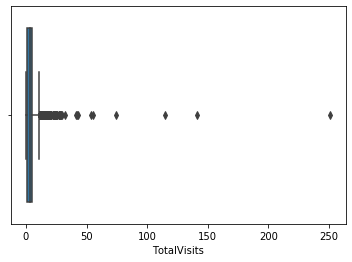

In [89]:
sns.boxplot(lead_df['TotalVisits'])

### As we can see there are outliers in the data.We will cap the outliers to 99% value for analysis.

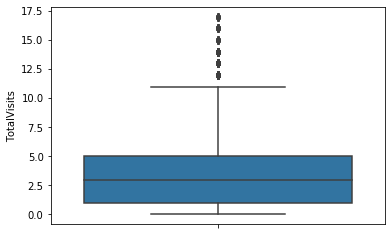

In [90]:
Q3 = lead_df.TotalVisits.quantile(0.99)
lead_df = lead_df[(lead_df.TotalVisits <= Q3)]
Q1 = lead_df.TotalVisits.quantile(0.01)
lead_df = lead_df[(lead_df.TotalVisits >= Q1)]
sns.boxplot(y=lead_df['TotalVisits'])
plt.show()

In [91]:
lead_df['Page Views Per Visit'].describe()

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

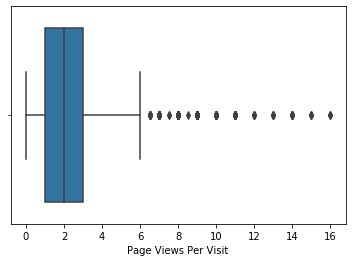

In [92]:
sns.boxplot(lead_df['Page Views Per Visit'])
plt.show()

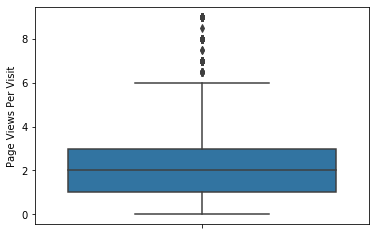

In [93]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df = lead_df[lead_df['Page Views Per Visit'] <= Q3]
Q1 = lead_df['Page Views Per Visit'].quantile(0.01)
lead_df = lead_df[lead_df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lead_df['Page Views Per Visit'])
plt.show()

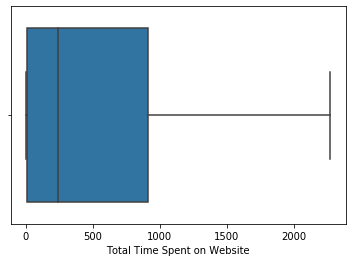

In [94]:
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.show()

##### No outliers present

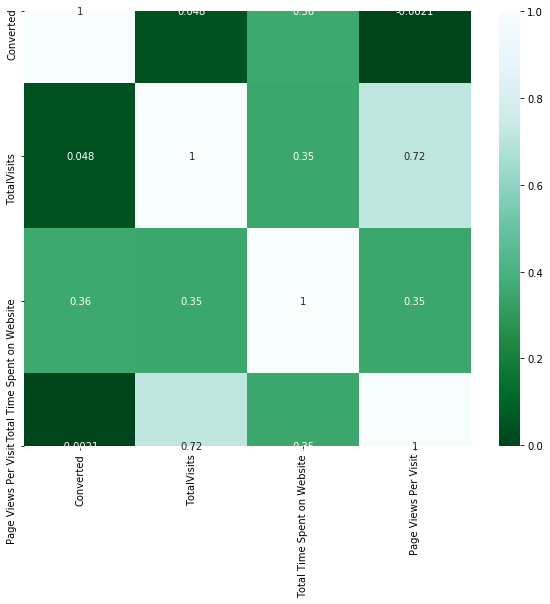

In [95]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(lead_df.corr(), cmap="BuGn_r", annot=True)
plt.show()

#### Inference: 
##### Page Views Per Visit and Totalvisits are highly correlated.

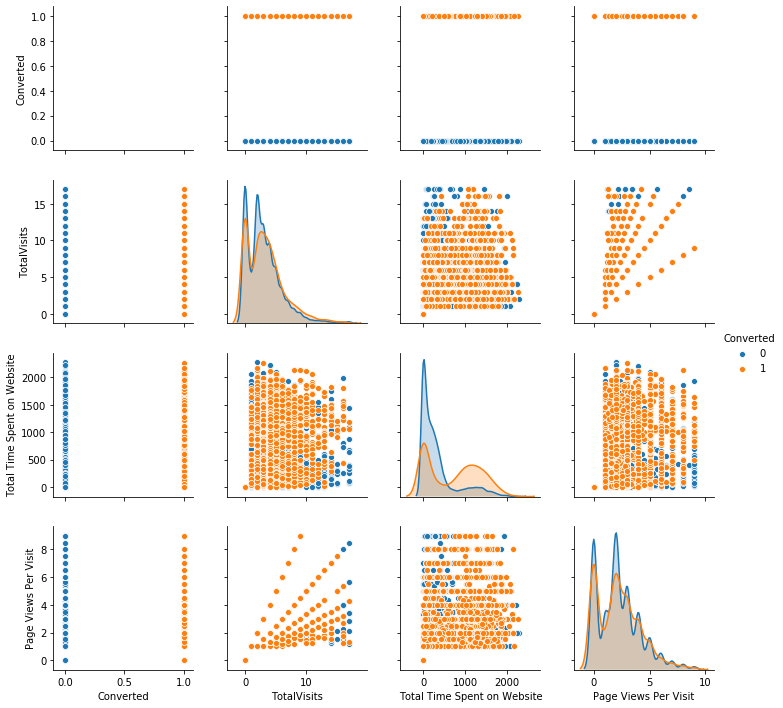

In [96]:
sns.pairplot(lead_df,diag_kind='kde',hue='Converted')
plt.show()

## Dummy Variables:

In [97]:
cat_leads = lead_df.loc[:,lead_df.dtypes == 'object']
cat_leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [98]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the customer list
lead_df[varlist] = lead_df[varlist].apply(binary_map)

In [99]:
dummy = pd.get_dummies(lead_df[['Lead Origin','Last Activity','Last Notable Activity','Lead Source','What is your current occupation']], drop_first=True)
lead_df=pd.concat([lead_df,dummy],axis=1)

In [100]:
dummy = pd.get_dummies(lead_df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
lead_df = pd.concat([lead_df, dummy], axis = 1)

In [101]:
#dropping the original columns after dummy variable creation

lead_df.drop(cat_leads,1,inplace = True)

In [102]:
lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
len(lead_df.index)

8924

## Train-Test Split & Logistic Regression Model Building:

In [104]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = lead_df['Converted']

y.head()

X=lead_df.drop('Converted', axis=1)

In [105]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Scaling

In [106]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
6676,-0.049636,1.395668,0.395289,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6138,0.297929,0.609686,0.926758,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8650,-0.049636,1.178657,0.395289,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3423,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6552,-1.092332,-0.878390,-1.199117,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


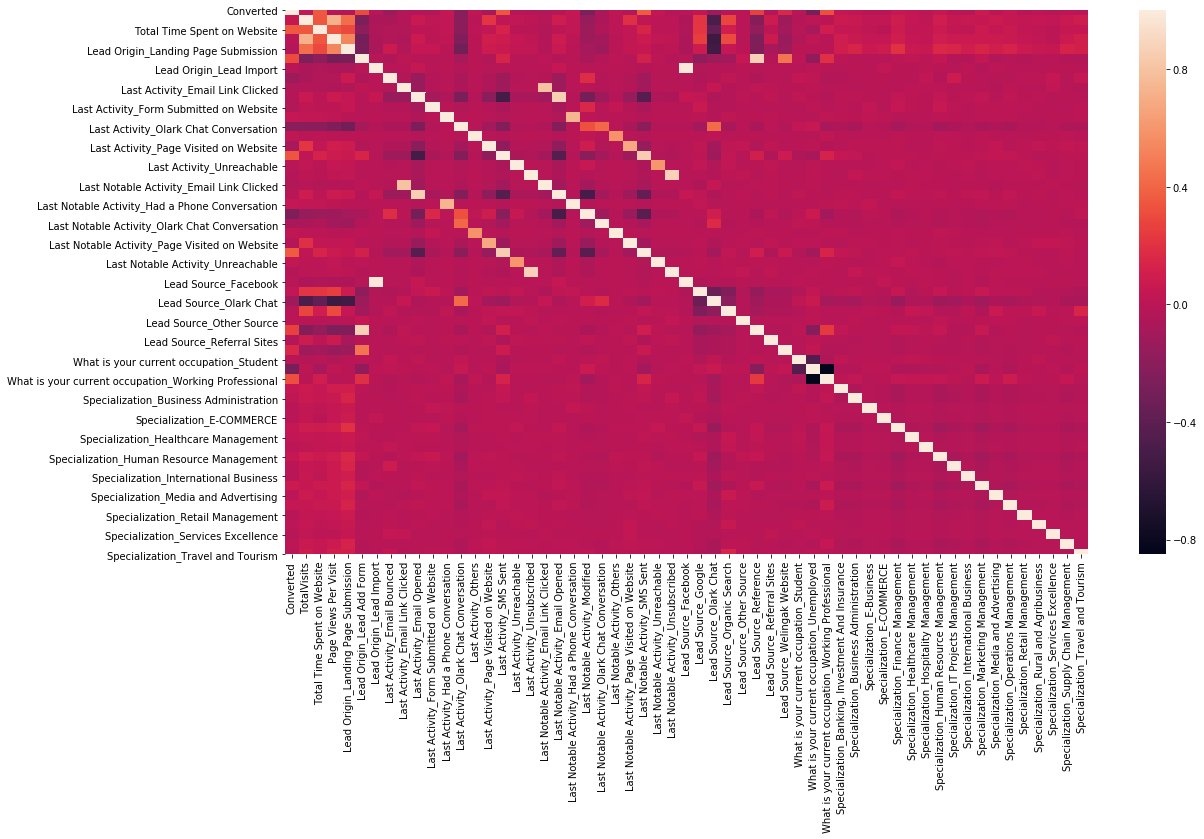

In [107]:
plt.figure(figsize=(18,10))
sns.heatmap(lead_df.corr())
plt.show()

## Model Building 

In [108]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [109]:
rfe.support_

array([False,  True, False, False,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False,  True, False, False,  True, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False])

In [110]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 18),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 33),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 32),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 31),
 ('Last Activity_Unsubscribed', False, 23),
 ('Last Notable Activity_Email Link Clicked', False, 19),
 ('Last Notable Activity_Email Opened', False, 20),
 ('Last Notable Activity_Had a Phone Conversation', True, 1),
 ('Last Notable Activity_Modified', False, 17),
 ('Last Notable Activit

In [111]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Marketing Management'],
      dtype='object')

In [112]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unsubscribed', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Other Source', 'Lead Source_Referral Sites',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospit

In [113]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6225
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.8
Date:                Mon, 11 Jan 2021   Deviance:                       5207.7
Time:                        21:45:42   Pearson chi2:                 6.51e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7038      0.581     -1.211      0.226      -1.843       0.435
Total Time Spent on Website                              1.1273      0.041     27.817      0.000       1.048       1.207
Lead Origin_Lead Add Form                                2.5301      0.890      2.842      0.004       0.785       4.275
Lead Origin_Lead Import                                  1.4076      0.485      2.902      0.004       0.457       2.358
Last Activity_Email Bounced                             -1.5943      0.375     -4.246      0.000      -2.330      -0.858
Last Activity_Email Opened                               0.7474      0.107      7.010      0.000       0.538       0.956
Last Activity_Had a Phone Conversation                   2.4273      0.954      2.544      0.011       0.557       4.297
Last Activity_Olark Chat Conversation                   -0.8807      0.185     -4.763      0.000      -1.243      -0.518
Last Activity_Others                                     2.1541      0.821      2.623      0.009       0.545       3.763
Last Activity_SMS Sent                                   0.7362      0.165      4.461      0.000       0.413       1.060
Last Notable Activity_Had a Phone Conversation          21.8560   1.74e+04      0.001      0.999   -3.42e+04    3.42e+04
Last Notable Activity_SMS Sent                           1.4527      0.152      9.549      0.000       1.155       1.751
Last Notable Activity_Unreachable                        2.5451      0.601      4.234      0.000       1.367       3.723
Lead Source_Olark Chat                                   1.2473      0.104     12.043      0.000       1.044       1.450
Lead Source_Reference                                    1.4028      0.917      1.530      0.126      -0.394       3.200
Lead Source_Welingak Website                             3.1834      1.146      2.777      0.005       0.936       5.430
What is your current occupation_Student                 -1.1907      0.620     -1.922      0.055      -2.405       0.024
What is your current occupation_Unemployed              -1.4212      0.577     -2.462      0.014      -2.553      -0.290
What is your current occupation_Working Professional     1.3063      0.604      2.162      0.031       0.122       2.490
Specialization_Banking, Investment And Insurance         0.3510      0.184      1.907      0.057      -0.010       0.712
Specialization_Marketing Management                      0.3735      0.118      3.157      0.002       0.142       0.605
========================================================================================================================
"""

In [114]:
#dropping column with high p-value
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

In [115]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6226
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.5
Date:                Mon, 11 Jan 2021   Deviance:                       5211.0
Time:                        21:45:43   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7040      0.581     -1.212      0.226      -1.843       0.435
Total Time Spent on Website                              1.1268      0.041     27.810      0.000       1.047       1.206
Lead Origin_Lead Add Form                                2.5301      0.890      2.842      0.004       0.785       4.275
Lead Origin_Lead Import                                  1.4077      0.485      2.902      0.004       0.457       2.358
Last Activity_Email Bounced                             -1.5942      0.375     -4.246      0.000      -2.330      -0.858
Last Activity_Email Opened                               0.7471      0.107      7.008      0.000       0.538       0.956
Last Activity_Had a Phone Conversation                   3.4475      0.829      4.157      0.000       1.822       5.073
Last Activity_Olark Chat Conversation                   -0.8808      0.185     -4.764      0.000      -1.243      -0.518
Last Activity_Others                                     2.1540      0.821      2.624      0.009       0.545       3.763
Last Activity_SMS Sent                                   0.7360      0.165      4.460      0.000       0.413       1.059
Last Notable Activity_SMS Sent                           1.4525      0.152      9.548      0.000       1.154       1.751
Last Notable Activity_Unreachable                        2.5451      0.601      4.234      0.000       1.367       3.723
Lead Source_Olark Chat                                   1.2472      0.104     12.043      0.000       1.044       1.450
Lead Source_Reference                                    1.4008      0.917      1.528      0.127      -0.396       3.198
Lead Source_Welingak Website                             3.1834      1.146      2.777      0.005       0.936       5.430
What is your current occupation_Student                 -1.1911      0.620     -1.923      0.055      -2.405       0.023
What is your current occupation_Unemployed              -1.4212      0.577     -2.462      0.014      -2.553      -0.290
What is your current occupation_Working Professional     1.3055      0.604      2.161      0.031       0.122       2.489
Specialization_Banking, Investment And Insurance         0.3614      0.183      1.970      0.049       0.002       0.721
Specialization_Marketing Management                      0.3761      0.118      3.182      0.001       0.144       0.608
========================================================================================================================
"""

In [116]:
#dropping column with high p-value
col = col.drop('Lead Source_Reference',1)

In [117]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6227
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.5
Date:                Mon, 11 Jan 2021   Deviance:                       5213.0
Time:                        21:45:45   Pearson chi2:                 6.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7018      0.581     -1.209      0.227      -1.840       0.436
Total Time Spent on Website                              1.1260      0.041     27.788      0.000       1.047       1.205
Lead Origin_Lead Add Form                                3.8676      0.226     17.141      0.000       3.425       4.310
Lead Origin_Lead Import                                  1.4069      0.485      2.901      0.004       0.456       2.358
Last Activity_Email Bounced                             -1.5945      0.375     -4.247      0.000      -2.330      -0.859
Last Activity_Email Opened                               0.7460      0.107      6.998      0.000       0.537       0.955
Last Activity_Had a Phone Conversation                   3.4472      0.829      4.157      0.000       1.822       5.072
Last Activity_Olark Chat Conversation                   -0.8802      0.185     -4.761      0.000      -1.243      -0.518
Last Activity_Others                                     2.1560      0.820      2.628      0.009       0.548       3.764
Last Activity_SMS Sent                                   0.7389      0.165      4.482      0.000       0.416       1.062
Last Notable Activity_SMS Sent                           1.4497      0.152      9.542      0.000       1.152       1.747
Last Notable Activity_Unreachable                        2.5462      0.601      4.239      0.000       1.369       3.724
Lead Source_Olark Chat                                   1.2456      0.104     12.021      0.000       1.043       1.449
Lead Source_Welingak Website                             1.8445      0.755      2.443      0.015       0.365       3.324
What is your current occupation_Student                 -1.1890      0.619     -1.921      0.055      -2.402       0.024
What is your current occupation_Unemployed              -1.4230      0.577     -2.467      0.014      -2.554      -0.292
What is your current occupation_Working Professional     1.3056      0.604      2.163      0.031       0.122       2.489
Specialization_Banking, Investment And Insurance         0.3635      0.183      1.983      0.047       0.004       0.723
Specialization_Marketing Management                      0.3773      0.118      3.193      0.001       0.146       0.609
========================================================================================================================
"""

In [118]:
#dropping column with high p-value
col = col.drop('What is your current occupation_Student',1)

In [119]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6228
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.4
Date:                Mon, 11 Jan 2021   Deviance:                       5216.8
Time:                        21:45:46   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7210      0.227     -7.592      0.000      -2.165      -1.277
Total Time Spent on Website                              1.1275      0.041     27.832      0.000       1.048       1.207
Lead Origin_Lead Add Form                                3.8655      0.226     17.142      0.000       3.423       4.307
Lead Origin_Lead Import                                  1.4079      0.485      2.903      0.004       0.457       2.359
Last Activity_Email Bounced                             -1.6105      0.375     -4.291      0.000      -2.346      -0.875
Last Activity_Email Opened                               0.7426      0.106      6.974      0.000       0.534       0.951
Last Activity_Had a Phone Conversation                   3.4445      0.829      4.153      0.000       1.819       5.070
Last Activity_Olark Chat Conversation                   -0.8840      0.185     -4.785      0.000      -1.246      -0.522
Last Activity_Others                                     2.1541      0.821      2.625      0.009       0.546       3.763
Last Activity_SMS Sent                                   0.7377      0.165      4.479      0.000       0.415       1.061
Last Notable Activity_SMS Sent                           1.4457      0.152      9.523      0.000       1.148       1.743
Last Notable Activity_Unreachable                        2.5420      0.601      4.231      0.000       1.364       3.720
Lead Source_Olark Chat                                   1.2429      0.104     12.001      0.000       1.040       1.446
Lead Source_Welingak Website                             1.8467      0.755      2.446      0.014       0.367       3.327
What is your current occupation_Unemployed              -0.4004      0.211     -1.902      0.057      -0.813       0.012
What is your current occupation_Working Professional     2.3279      0.276      8.426      0.000       1.786       2.869
Specialization_Banking, Investment And Insurance         0.3553      0.183      1.939      0.053      -0.004       0.714
Specialization_Marketing Management                      0.3848      0.118      3.262      0.001       0.154       0.616
========================================================================================================================
"""

In [120]:
#dropping column with high p-value
col = col.drop('What is your current occupation_Unemployed',1)

In [121]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6229
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.2
Date:                Mon, 11 Jan 2021   Deviance:                       5220.4
Time:                        21:45:47   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1108      0.098    -21.464      0.000      -2.304      -1.918
Total Time Spent on Website                              1.1280      0.041     27.846      0.000       1.049       1.207
Lead Origin_Lead Add Form                                3.8808      0.225     17.220      0.000       3.439       4.322
Lead Origin_Lead Import                                  1.3978      0.485      2.883      0.004       0.448       2.348
Last Activity_Email Bounced                             -1.5949      0.375     -4.249      0.000      -2.331      -0.859
Last Activity_Email Opened                               0.7451      0.106      7.000      0.000       0.536       0.954
Last Activity_Had a Phone Conversation                   3.4323      0.829      4.138      0.000       1.807       5.058
Last Activity_Olark Chat Conversation                   -0.8767      0.185     -4.748      0.000      -1.239      -0.515
Last Activity_Others                                     2.1422      0.821      2.610      0.009       0.534       3.751
Last Activity_SMS Sent                                   0.7302      0.165      4.437      0.000       0.408       1.053
Last Notable Activity_SMS Sent                           1.4469      0.152      9.534      0.000       1.149       1.744
Last Notable Activity_Unreachable                        2.5308      0.601      4.212      0.000       1.353       3.708
Lead Source_Olark Chat                                   1.2450      0.104     12.022      0.000       1.042       1.448
Lead Source_Welingak Website                             1.8238      0.755      2.416      0.016       0.344       3.303
What is your current occupation_Working Professional     2.7161      0.187     14.562      0.000       2.351       3.082
Specialization_Banking, Investment And Insurance         0.3652      0.183      1.994      0.046       0.006       0.724
Specialization_Marketing Management                      0.3860      0.118      3.273      0.001       0.155       0.617
========================================================================================================================
"""

In [122]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.644428
6138    0.680040
8650    0.954574
3423    0.061037
6552    0.247604
1696    0.190026
2110    0.886231
6830    0.019751
2581    0.208730
5927    0.048611
dtype: float64

In [123]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64442782, 0.68003979, 0.95457353, 0.061037  , 0.24760371,
       0.19002564, 0.88623094, 0.01975126, 0.20873034, 0.04861128])

In [124]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.644428,6676
1,1,0.680040,6138
2,1,0.954574,8650
3,0,0.061037,3423
4,0,0.247604,6552


In [125]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.40 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.644428,6676,1
1,1,0.680040,6138,1
2,1,0.954574,8650,1
3,0,0.061037,3423,0
4,0,0.247604,6552,0


In [126]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.644428,6676,1
1,1,0.680040,6138,1
2,1,0.954574,8650,1
3,0,0.061037,3423,0
4,0,0.247604,6552,0


In [127]:
from sklearn import metrics

In [128]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3243  628]
 [ 547 1828]]


In [129]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8118796029458853


#### Checking VIF

In [130]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_SMS Sent,5.26
9,Last Notable Activity_SMS Sent,5.08
11,Lead Source_Olark Chat,1.76
1,Lead Origin_Lead Add Form,1.53
6,Last Activity_Olark Chat Conversation,1.38
0,Total Time Spent on Website,1.30
12,Lead Source_Welingak Website,1.30
4,Last Activity_Email Opened,1.25
13,What is your current occupation_Working Profes...,1.16
15,Specialization_Marketing Management,1.11


In [132]:
col = col.drop('Last Activity_SMS Sent', 1)

In [133]:
#BUILDING MODEL #6

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.8
Date:                Mon, 11 Jan 2021   Deviance:                       5239.7
Time:                        21:45:50   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9002      0.083    -23.025      0.000      -2.062      -1.738
Total Time Spent on Website                              1.1294      0.040     27.938      0.000       1.050       1.209
Lead Origin_Lead Add Form                                3.9331      0.225     17.459      0.000       3.492       4.375
Lead Origin_Lead Import                                  1.4884      0.487      3.053      0.002       0.533       2.444
Last Activity_Email Bounced                             -1.8054      0.372     -4.859      0.000      -2.534      -1.077
Last Activity_Email Opened                               0.5307      0.092      5.762      0.000       0.350       0.711
Last Activity_Had a Phone Conversation                   3.2194      0.828      3.890      0.000       1.597       4.842
Last Activity_Olark Chat Conversation                   -1.0913      0.177     -6.173      0.000      -1.438      -0.745
Last Activity_Others                                     1.9280      0.819      2.353      0.019       0.322       3.534
Last Notable Activity_SMS Sent                           1.9642      0.101     19.361      0.000       1.765       2.163
Last Notable Activity_Unreachable                        2.3193      0.599      3.873      0.000       1.146       3.493
Lead Source_Olark Chat                                   1.2513      0.103     12.093      0.000       1.049       1.454
Lead Source_Welingak Website                             1.9005      0.755      2.518      0.012       0.421       3.380
What is your current occupation_Working Professional     2.6981      0.186     14.522      0.000       2.334       3.062
Specialization_Banking, Investment And Insurance         0.3824      0.182      2.098      0.036       0.025       0.740
Specialization_Marketing Management                      0.3823      0.118      3.252      0.001       0.152       0.613
========================================================================================================================
"""

In [134]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.643162
6138    0.679753
8650    0.954447
3423    0.061099
6552    0.247822
1696    0.224724
2110    0.884082
6830    0.019750
2581    0.245836
5927    0.059272
dtype: float64

In [135]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64316242, 0.67975294, 0.95444687, 0.06109867, 0.2478225 ,
       0.22472432, 0.88408202, 0.01974992, 0.24583589, 0.05927155])

In [136]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.643162,6676
1,1,0.679753,6138
2,1,0.954447,8650
3,0,0.061099,3423
4,0,0.247822,6552


In [137]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.50 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.643162,6676,1
1,1,0.679753,6138,1
2,1,0.954447,8650,1
3,0,0.061099,3423,0
4,0,0.247822,6552,0


In [138]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3421,  450],
       [ 719, 1656]], dtype=int64)

In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8128402177393532

In [140]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Lead Source_Olark Chat,1.74
1,Lead Origin_Lead Add Form,1.51
6,Last Activity_Olark Chat Conversation,1.38
0,Total Time Spent on Website,1.30
11,Lead Source_Welingak Website,1.29
4,Last Activity_Email Opened,1.25
8,Last Notable Activity_SMS Sent,1.24
12,What is your current occupation_Working Profes...,1.16
14,Specialization_Marketing Management,1.10
13,"Specialization_Banking, Investment And Insurance",1.04


## Metrics beyond simply accuracy

In [141]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6972631578947368

In [143]:
# Let us calculate specificity
TN / float(TN+FP)

0.8837509687419272

In [144]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.11624903125807284


In [145]:
# positive predictive value 
print (TP / float(TP+FP))

0.7863247863247863


In [146]:
# Negative predictive value
print (TN / float(TN+ FN))

0.826328502415459


In [147]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [148]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

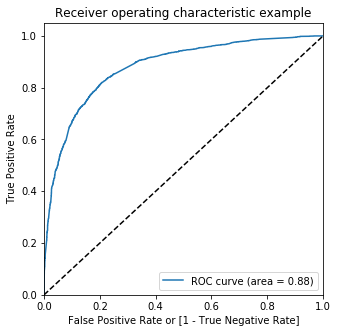

In [149]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Finding Optimal Cutoff Point

In [150]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.643162,6676,1,1,1,1,1,1,1,1,0,0,0
1,1,0.679753,6138,1,1,1,1,1,1,1,1,0,0,0
2,1,0.954447,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.061099,3423,0,1,0,0,0,0,0,0,0,0,0
4,0,0.247822,6552,0,1,1,1,0,0,0,0,0,0,0


In [152]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
#TP = confusion[1,1] # true positive 
#TN = confusion[0,0] # true negatives
#FP = confusion[0,1] # false positives
#FN = confusion[1,0] # false negatives


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.602946  0.963789  0.381555
0.2   0.2  0.746238  0.908632  0.646603
0.3   0.3  0.796510  0.835368  0.772669
0.4   0.4  0.810279  0.768842  0.835701
0.5   0.5  0.812840  0.697263  0.883751
0.6   0.6  0.796350  0.581895  0.927926
0.7   0.7  0.780820  0.505684  0.949625
0.8   0.8  0.758886  0.410105  0.972875
0.9   0.9  0.713096  0.265684  0.987600


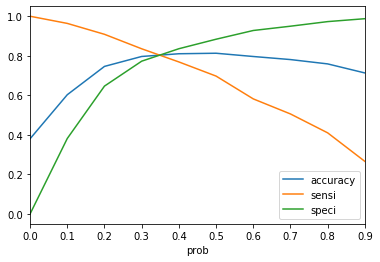

In [153]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [154]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.643162,6676,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.679753,6138,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.954447,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.061099,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.247822,6552,0,1,1,1,0,0,0,0,0,0,0,0


In [155]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7965097662504003

In [156]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2991,  880],
       [ 391, 1984]], dtype=int64)

In [157]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [158]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8353684210526315

In [159]:
# Let us calculate specificity
TN / float(TN+FP)

0.7726685610953242

In [160]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.2273314389046758


In [161]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6927374301675978


In [162]:
# Negative predictive value
print (TN / float(TN+ FN))

0.884387936132466


### Train Data :-
#### Accuracy : 79.65% <br/>Sensitivity : 83.53% <br/>Specificity : 77.26%

### Precision and Recall

In [163]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3421,  450],
       [ 719, 1656]], dtype=int64)

In [164]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7863247863247863

In [165]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6972631578947368

### Precision and recall tradeoff

In [166]:
from sklearn.metrics import precision_recall_curve

In [167]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    1
 6242    1
 6243    0
 6244    0
 6245    0
 Name: Converted, Length: 6246, dtype: int64, 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    0
 6242    0
 6243    0
 6244    1
 6245    0
 Name: Predicted, Length: 6246, dtype: int64)

In [168]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

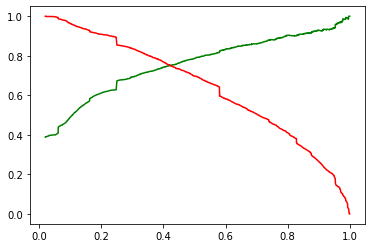

In [169]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [170]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

In [171]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Lead Source_Olark Chat,Lead Source_Welingak Website,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Marketing Management
7625,2.077703,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5207,0.739164,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2390,-0.878390,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4362,-0.455310,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1023,-0.300302,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [172]:
X_test_sm = sm.add_constant(X_test)

In [173]:
y_test_pred = res.predict(X_test_sm)

In [174]:
y_test_pred[:10]

7625    0.726530
5207    0.461987
2390    0.952802
4362    0.483042
1023    0.153338
8226    0.662300
3079    0.102353
530     0.164341
7873    0.061099
5146    0.788334
dtype: float64

In [175]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [176]:
# Let's see the head
y_pred_1.head()

,0
7625,0.726530
5207,0.461987
2390,0.952802
4362,0.483042
1023,0.153338


In [177]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [178]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [179]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [180]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [181]:
y_pred_final.head()

,Converted,CustID,0
0,0,7625,0.726530
1,1,5207,0.461987
2,1,2390,0.952802
3,0,4362,0.483042
4,0,1023,0.153338


In [182]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [183]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Converted_Prob'], axis=1)

In [184]:
# Let's see the head of y_pred_final
y_pred_final['Converted_Prob'].mean()

0.37666238727879847

In [185]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.30 else 0)

In [186]:
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted
0,7625,0,0.726530,1
1,5207,1,0.461987,1
2,2390,1,0.952802,1
3,4362,0,0.483042,1
4,1023,0,0.153338,0


In [187]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7815533980582524

In [188]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1271,  413],
       [ 172,  822]], dtype=int64)

In [189]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [190]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8269617706237424

In [191]:
# Let us calculate specificity
TN / float(TN+FP)

0.754750593824228

### Test Data :-
#### Accuracy : 78.15% <br/>Sensitivity : 82.69%<br/>Specificity : 75.47%

# Conclusion :
## Train Data :-
### Accuracy : 79.65% <br/>Sensitivity : 83.53% <br/>Specificity : 77.26%

## Test Data :-
### Accuracy : 78.15% <br/>Sensitivity : 82.69%<br/>Specificity : 75.47%